# Generate some data with non-linear boundary

In [13]:
library('e1071')

In [1]:
set.seed(1)
x= matrix(rnorm(200*2), ncol=2)
x[1:100,] = x[1:100,] +2
x[101:150,] = x[101:150,] -2
y= c(rep(1,150),rep(2,50))
data = data.frame(x=x,y=as.factor(y))

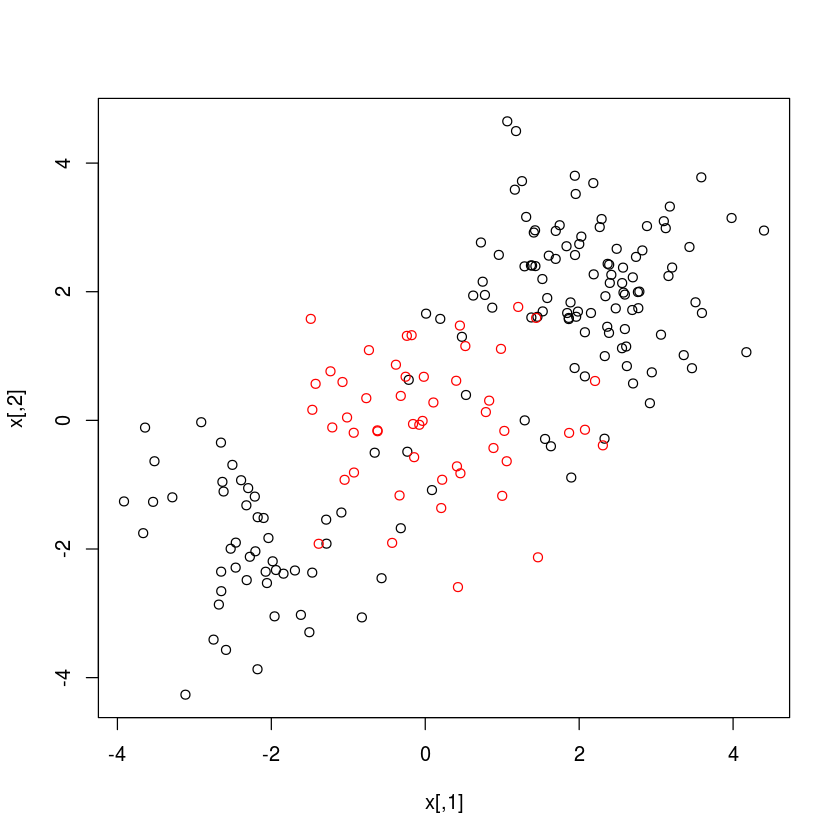

In [9]:
plot(x,col=y) # color =y

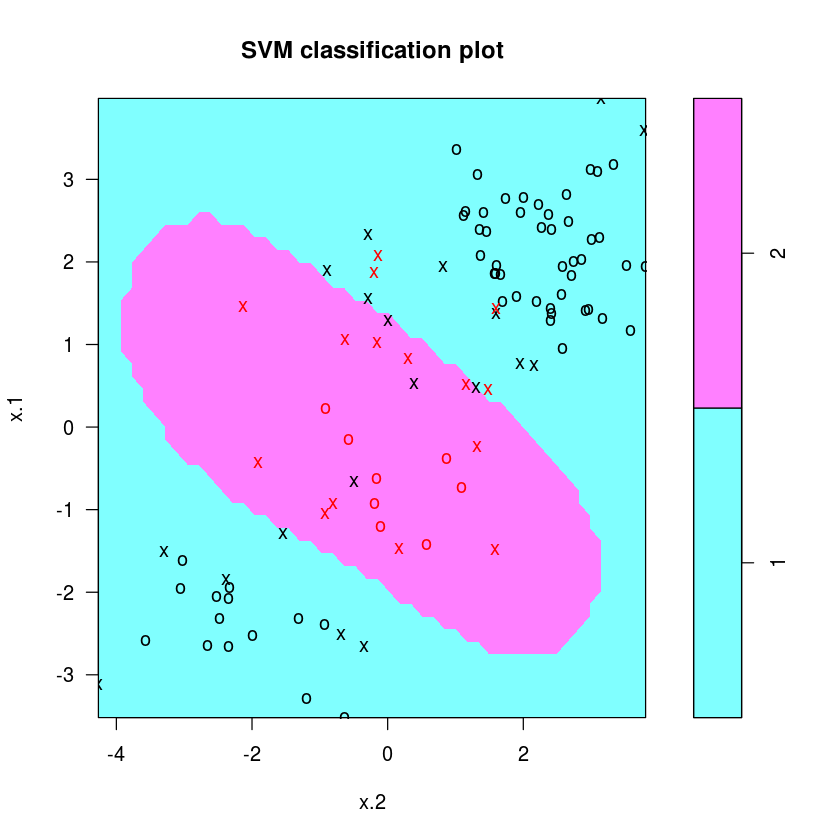

In [17]:
# Split the data into training and training set
train=sample(200,100)
svm.fit = svm(y~., data=data[train,], kernel="radial", gamma=1, cost =1) 
plot(svm.fit,data[train,])

In [18]:
summary(svm.fit)


Call:
svm(formula = y ~ ., data = data[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  34

 ( 19 15 )


Number of Classes:  2 

Levels: 
 1 2




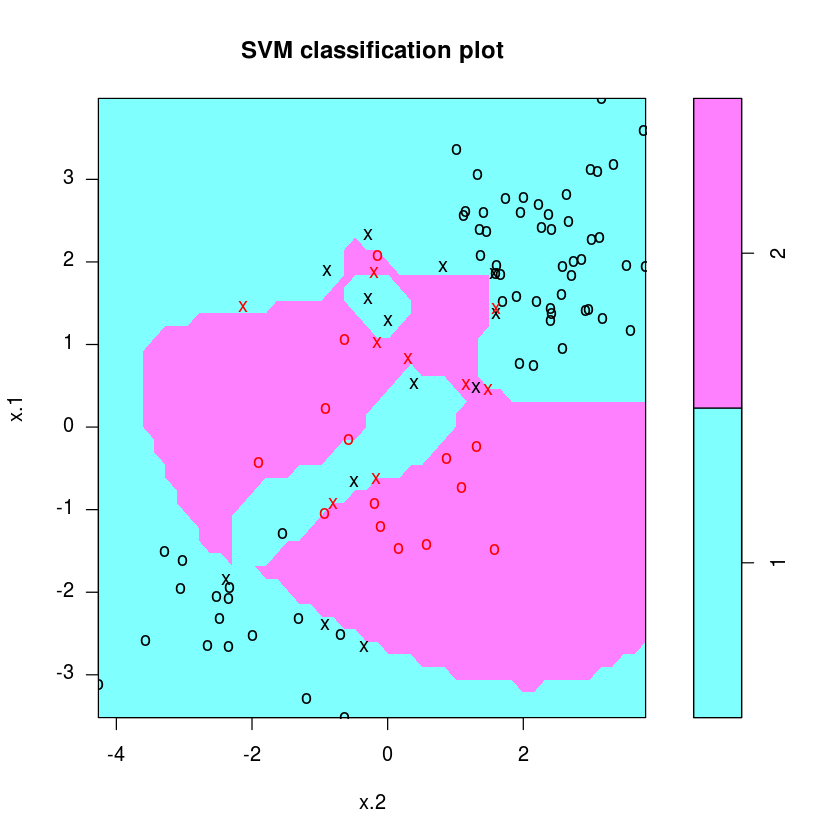

In [19]:
# For higher value fo cost
svm.fit = svm(y~., data=data[train,], kernel="radial", gamma=1, cost =1e5) 
plot(svm.fit,data[train,])

## Select best value fo cost and lambda/gamma using tune() function which uses 10 fold cross validation 

In [33]:
tune.out = tune(svm,y~., data=data[train,], kernel="radial", ranges=list(cost=c(0.1,1,10,100,1000), gamma=c(0.5,1,2,3,4)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.12 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.23 0.11595018
2  1e+00   0.5  0.14 0.08432740
3  1e+01   0.5  0.12 0.07888106
4  1e+02   0.5  0.13 0.08232726
5  1e+03   0.5  0.18 0.07888106
6  1e-01   1.0  0.23 0.11595018
7  1e+00   1.0  0.14 0.08432740
8  1e+01   1.0  0.14 0.06992059
9  1e+02   1.0  0.16 0.09660918
10 1e+03   1.0  0.22 0.10327956
11 1e-01   2.0  0.23 0.11595018
12 1e+00   2.0  0.15 0.07071068
13 1e+01   2.0  0.16 0.09660918
14 1e+02   2.0  0.21 0.11005049
15 1e+03   2.0  0.21 0.12866839
16 1e-01   3.0  0.23 0.11595018
17 1e+00   3.0  0.15 0.07071068
18 1e+01   3.0  0.17 0.10593499
19 1e+02   3.0  0.22 0.12292726
20 1e+03   3.0  0.20 0.14142136
21 1e-01   4.0  0.23 0.11595018
22 1e+00   4.0  0.16 0.06992059
23 1e+01   4.0  0.17 0.11595018
24 1e+02   4.0  0.20 0.14142136
25 1e+03   4.0  0.18 0

In [37]:
svm.pred = predict(tune.out$best.model, data[-train,])
table(svm.pred,data$y[-train])

        
svm.pred  1  2
       1 64  5
       2  9 22

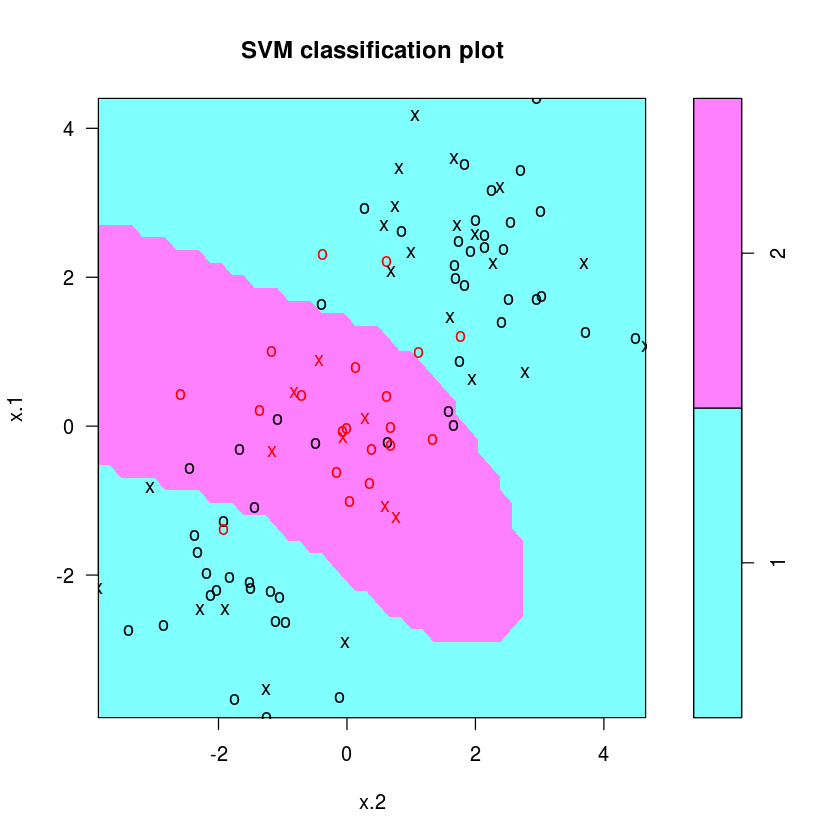

In [42]:
plot(tune.out$best.model, data[-train,])

In [39]:
(15)/100

[1] 0.15

## 15%  are misclassified.

# Plot ROC Curves

In [44]:
library('ROCR')
rocplot = function(pred,truth,...){
    predob = prediction(pred,truth)
    perf = performance(predob,"tpr","fpr")
    plot(perf,...)
}

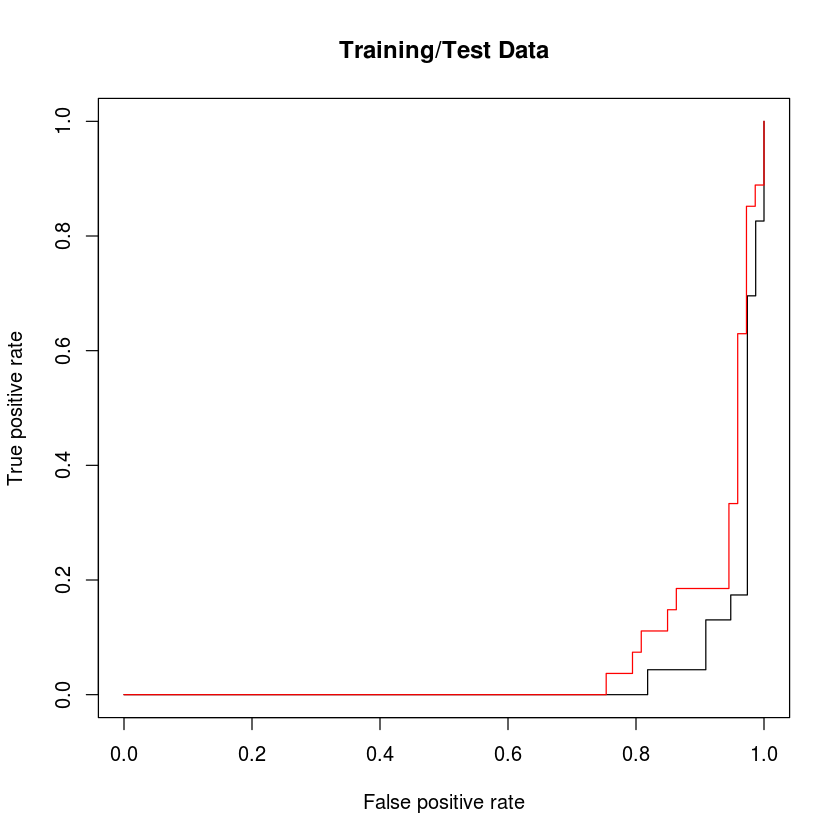

In [74]:
#If we use decision.values=T while fitting svm(), then predict() function will ouput the fitted values.
svm.fit = svm(y~., data=data[train,], kernel="radial", cost=10, gamma=0.5, decision.values=T)

svm.fitted =attributes(predict(svm.fit ,data[train ,], decision.values=TRUE))$decision.values
rocplot(svm.fitted,data[train,"y"], main="Training/Test Data")

svm.fitted.test =attributes(predict(svm.fit ,data[-train ,], decision.values=TRUE))$decision.values
rocplot(svm.fitted.test,data[-train,"y"], main="Training/Test Data", add=T,col="red ")